Semiconductors are the brains of modern electronics. They enable technologies critical to a country's economic growth, national security, and global competitiveness. From smartphones to planes, semiconductors evolved to improve technologies and do wonders for your entertainment and convenience. Industry sectors that rely a lot on semiconductors are Computing, Telecommunications, Household Appliances, Banking, Security, Automotive/Transportation, Healthcare and Manufacturing [1].

To build up the devices of a chip we need the basic substrate, the wafers. A wafer is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits. While the silicon is the basic material, there are wafers which include other elements.

Semiconductor manufacturers request wafers from suppliers based on the volume of orders and their experiments for process and technology enhancement and development. This dataset is a use-case from one of India's leading manufacturers of wafers. No wafer manufacturer want to create products with anomalies. There are two datasets, the Train.csv and Test.csv. The Train.csv includes features (without indicating the role during the production) and the class of Fail or Pass for the wafer. The role of this project is to find a model that forecasts the wafers with anomalies.

The dataset has been taken by kaggle:

https://www.kaggle.com/datasets/arbazkhan971/anomaly-detection



[1] https://www.makeuseof.com/why-semiconductors-important/

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [2]:
data = pd.read_csv("Train.csv")
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning

### Are there Nan values in the dataset?

In [3]:
data.any().isna()

feature_1       False
feature_2       False
feature_3       False
feature_4       False
feature_5       False
                ...  
feature_1555    False
feature_1556    False
feature_1557    False
feature_1558    False
Class           False
Length: 1559, dtype: bool

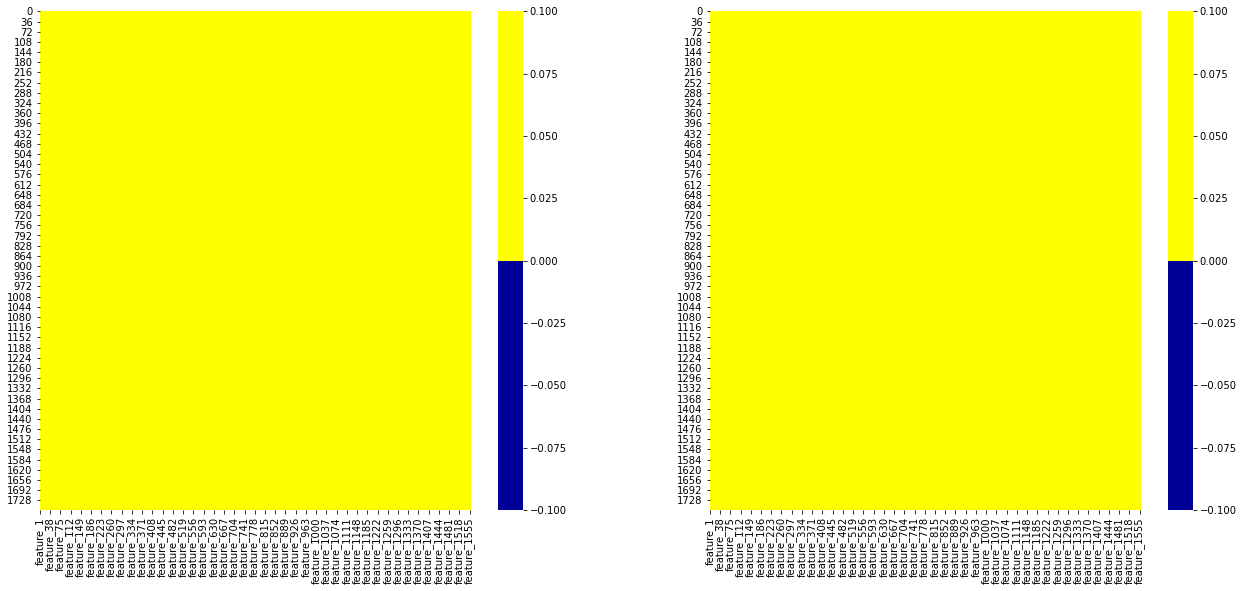

In [4]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

fig, ax = plt.subplots(1,2,figsize=(20,10))
fig.tight_layout(pad=10.0)

sns.heatmap(data.isna(), ax=ax[0], cmap=sns.color_palette(colours))
sns.heatmap(data.isnull(), ax=ax[1], cmap=sns.color_palette(colours));

There are no missing values in the dataset.

### What type of data do we have?

In [5]:
data.dtypes[data.columns]

feature_1         int64
feature_2         int64
feature_3       float64
feature_4         int64
feature_5         int64
                 ...   
feature_1555      int64
feature_1556      int64
feature_1557      int64
feature_1558      int64
Class             int64
Length: 1559, dtype: object

In [6]:
data.dtypes[data.columns].nunique()

2

The data types of the variables are two, int64 and float64. How many features have int64 and how many float64?

- int64

In [7]:
(data.dtypes[data.columns]=='int64').sum()

1558

- float64

In [8]:
(data.dtypes[data.columns]=='float64').sum()

1

So, there is only one float column. The rest columns have integer numbers.

Let's identify which column has float numbers.

In [9]:
which_float = (data.dtypes[data.columns]=='float64')
which_float[which_float==True].index

Index(['feature_3'], dtype='object')

The data type of **feature_3** is float.

Let's try to understand the rest features, those with data type int64.

Let's see how many of them have a single value, 2 unique values and how many have 3 and more. I will not the last variable which is the Class.

In [10]:
binary_features, categorical_features, single_value_features = [], [], []
for x in [col for col in data.columns if col not in ['feature_3','Class']]:
    number_of_categories = data[x].nunique()
    if number_of_categories==1:
        single_value_features.append(x)
    elif number_of_categories==2:
        binary_features.append(x)
    else:
        categorical_features.append(x)

Let's do a test, is the sum of the lengths of the lists plus 2 (for the columns feature_3 and Class) equal to the total number of columns of the dataset?

In [11]:
len(binary_features) + len(single_value_features) + len(categorical_features) + 2 == data.shape[1]

True

- **Binary features:**

In [12]:
len(binary_features)

1519

- **Categorical features**:

In [13]:
len(categorical_features)

2

- **single_value_features**:

In [14]:
len(single_value_features)

36

The categorical features are only 2, let's try to understand them:

In [15]:
data[categorical_features].describe()

,feature_1,feature_2
count,1763.000000,1763.000000
mean,53.094158,126.587067
std,55.842014,129.859641
min,1.000000,1.000000
25%,12.000000,33.500000
50%,39.000000,96.000000
75%,75.000000,159.000000
max,640.000000,640.000000


<AxesSubplot:>

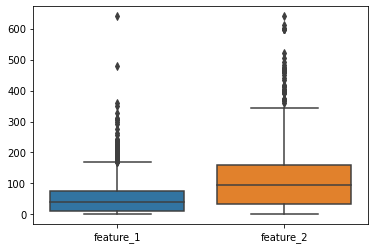

In [16]:
sns.boxplot(data = data[categorical_features])

These two variables have data types integer by definition, although they are continuous!! Thus, the variable which have a float data type and the categorical_features list will be merged into a single list:

In [17]:
continuous_features = categorical_features + ['feature_3']

Let's see the single_value_features:

In [18]:
data[single_value_features]

,feature_57,feature_82,feature_106,feature_147,feature_262,feature_278,feature_284,feature_320,feature_362,feature_372,...,feature_1038,feature_1063,feature_1096,feature_1185,feature_1211,feature_1243,feature_1247,feature_1341,feature_1367,feature_1407
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I will remove those variables

In [19]:
data = data.drop(single_value_features, axis=1)

In [20]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So, I have two lists:

- the **<u>binary_features</u>**, which include all variables with two categories
- the **<u>continuous_features</u>**, which include continuous variables

### There are a lot of variables. Are there duplicated features?

I can check the binary_variables. I will create a dataframe which will include two values, 0 & 1. Each feature will be tested if it is equal with another and if so the dataframe will include the 1, otherwise the 0.

In [21]:
duplicated_columns = []
for x in binary_features:
    x_feature_check_with_y = []
    for y in binary_features:
        if data[x].equals(data[y])==True:
            x_feature_check_with_y.append(1)
        else:
            x_feature_check_with_y.append(0)
    duplicated_columns.append(x_feature_check_with_y)

In [22]:
duplicated_columns = pd.DataFrame(duplicated_columns, columns=binary_features, index=binary_features)
duplicated_columns

,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
feature_4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
feature_5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
feature_6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
feature_7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
feature_8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_1554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
feature_1555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
feature_1556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
feature_1557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Visualize the table:

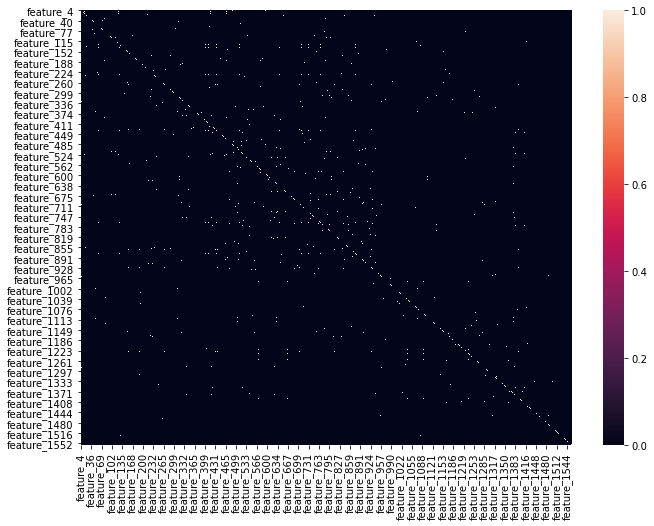

In [23]:
fig, ax = plt.subplots(1,1,figsize=(11,8))

sns.heatmap(duplicated_columns, ax=ax);

Obviously, the diagonal elements are equal to 1 because the feature is tested with itself. However, here one understands that there are others as well!

Nextly, I find the same features:

In [24]:
features_to_be_removed = []
i=0
while i<duplicated_columns.shape[0]:
    for j in range(i):
        if data[data.columns[i]].equals(data[data.columns[j]]):
            features_to_be_removed.append(data.columns[j])
    i+=1

Convert it to a pandas Series

In [25]:
pd.Series(features_to_be_removed).duplicated(keep=False)

0        True
1        True
2        True
3        True
4        True
        ...  
2708    False
2709     True
2710     True
2711     True
2712    False
Length: 2713, dtype: bool

Remove the columns from the dataframe

In [26]:
which_to_be_dropped = pd.Series(features_to_be_removed).drop_duplicates(keep='first')
data = data.drop(which_to_be_dropped.values, axis=1)
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_10,feature_13,feature_18,feature_21,feature_27,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Intererstingly, the original dataset had 1559 features and by checking for duplicates features the dataset was reduced more than 50%.**

### Duplicated rows

In [27]:
data[data.duplicated(keep=False)==True]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_10,feature_13,feature_18,feature_21,feature_27,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
5,90,90,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,18,24,1.3333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,10,600,60.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1720,90,90,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1722,15,80,5.3333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1723,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 96 rows which are similar...

Drop the duplicates

In [28]:
data = data.drop_duplicates()
data.reset_index(inplace=True)
data = data.drop('index',axis=1)

Redefine the binary features list:

In [29]:
binary_features = []
for x in [col for col in data.columns if col not in ['feature_1', 'feature_2', 'feature_3', 'Class']]:
    binary_features.append(x)

# Statistical Data Analysis

### Explain the statistical tests that you are doing!

Before I employ the statistical test I would like to check out the target variable, which is the 'Class'.

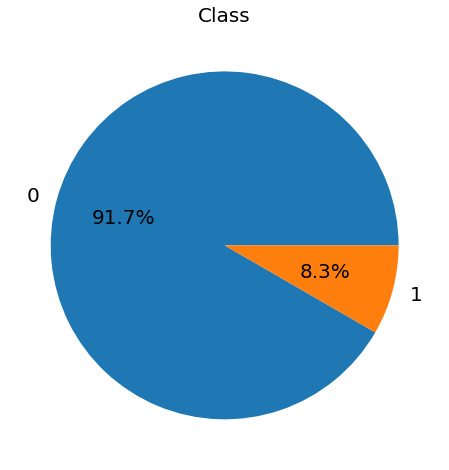

In [30]:
round((data.Class.value_counts()/data.Class.count())*100,2).plot.pie(autopct='%1.1f%%',
                                                                     figsize=(8,8), fontsize=20)
plt.title('Class', fontsize=20)
plt.ylabel('');

The target variable is completely imbalanced. Only 8.3% of the data are wafers which have been scrapped!! Forecasting in an imbalanced dataset can lead to misclassification and such a case has to be handled in a different way than a balanced dataset. In the predictions section I explain the two methods that I followed.

#### Check between two categorical variables

In [31]:
from sklearn.model_selection import train_test_split

X, y = data[binary_features], data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

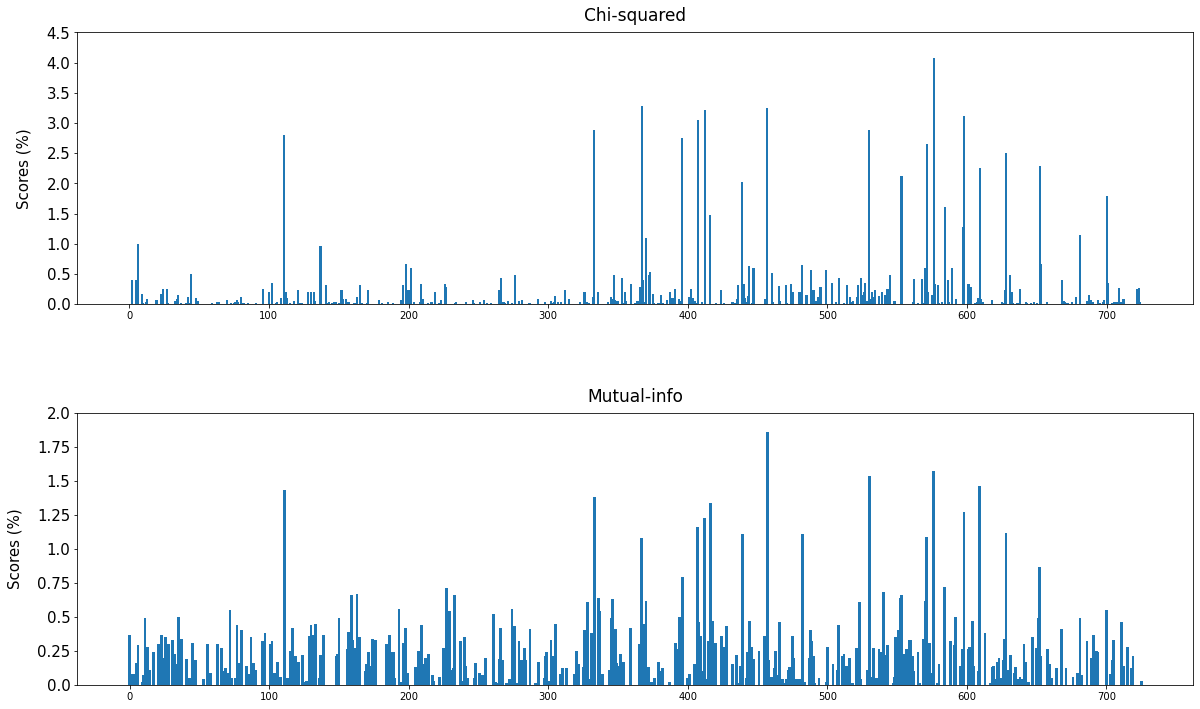

In [32]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

fs_chi = SelectKBest(score_func=chi2, k='all')
fs_chi.fit(X_train, y_train)

fs_mut = SelectKBest(score_func=mutual_info_classif, k='all')
fs_mut.fit(X_train, y_train)

# check the scores function for nan values and replace to 0
fs_chi.scores_[np.isnan(fs_chi.scores_)]=0
fs_mut.scores_[np.isnan(fs_mut.scores_)]=0

#calculate the scores
scores_chi = np.around((fs_chi.scores_/fs_chi.scores_.sum())*100,2)
scores_mut = np.around((fs_mut.scores_/fs_mut.scores_.sum())*100,2)

##########################################################################################
##########################################################################################

fig, ax = plt.subplots(2,1,figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

position = np.arange(len(fs_chi.scores_))


ax[0].bar(position, scores_chi, width=1.5)
ax[0].set_yticks(ax[0].get_yticks())
ax[0].set_yticklabels(np.around(ax[0].get_yticks(),2), fontsize=15)
ax[0].set_ylabel("Scores (%)", labelpad=15, fontsize=15)
ax[0].set_title("Chi-squared", y=1.02, fontsize=17)


ax[1].bar(position, scores_mut, width=2)
ax[1].set_yticks(ax[1].get_yticks())
ax[1].set_yticklabels(np.around(ax[1].get_yticks(),2), fontsize=15)
ax[1].set_ylabel("Scores (%)", labelpad=15, fontsize=15)
ax[1].set_title("Mutual-info", y=1.02, fontsize=17)

plt.savefig('chi-squared.png')

I will keep the features from the chi-squared test who pass the threshold of 1%. Firstly, let's see which features from both methods are passing the threshold and which are common?

- **Chi-squared**

In [33]:
data.columns[np.where(scores_chi>=1)]

Index(['feature_13', 'feature_345', 'feature_954', 'feature_1044',
       'feature_1048', 'feature_1110', 'feature_1137', 'feature_1149',
       'feature_1156', 'feature_1204', 'feature_1240', 'feature_1342',
       'feature_1370', 'feature_1392', 'feature_1397', 'feature_1405',
       'feature_1419', 'feature_1420', 'feature_1433', 'feature_1453',
       'feature_1481', 'feature_1511', 'feature_1530'],
      dtype='object')

- **Mutual info classif**

In [34]:
data.columns[np.where(scores_mut>=1)]

Index(['feature_345', 'feature_954', 'feature_1044', 'feature_1137',
       'feature_1149', 'feature_1156', 'feature_1204', 'feature_1240',
       'feature_1276', 'feature_1342', 'feature_1392', 'feature_1397',
       'feature_1420', 'feature_1433', 'feature_1453'],
      dtype='object')

Using chi-squared there are more features than mutual info classif which are passing the threshold. All of the features with mutual info classif are included in the chi-squared.

### Point Biserial -> Pearson 

This method checks the relation between a categorical and a continuous feature. It is a hypothesis test, where if it the probability-value is higher than alpha-value (threshold) one can say that the two features are correlated. 

There are some some assumptions which have been taken and work as requirements to apply the test:
- the data of the continuous variable are normally distributed,
- there are no outliers, and
- the variance between the categories is equal.

-> Check the distribution with Kolmogorov-Smirnov test. If data is not normally distributed, apply quantile transformer.

-> Check for outliers visually with boxplots or by using the function of LocalOutlierFactor from the neighbors class of scikit-learn. Remove them by applying on the dataset the result of the fitting.

-> Check for variances using levene test. If variances are not equal, you are not allowed to apply Biserial Point!


In fact, Point Biserial is mathematically equivalent to the Pearson. In terms of python libraries, one can use scipy to apply the Point Biserial test (after checking the requirements) or pandas for the correlation. For pandas, when one uses data.corr() or data.corrwith() technique, the Pearson is the default method (the other two are kendall-tau for strong agreement or disagreement and spearman for monotonicity).


Here, I am not going to use actively any of the methods, because the target variable of the dataset is completely unbalanced! I can check the correlation, but I won't take into consideration the result.

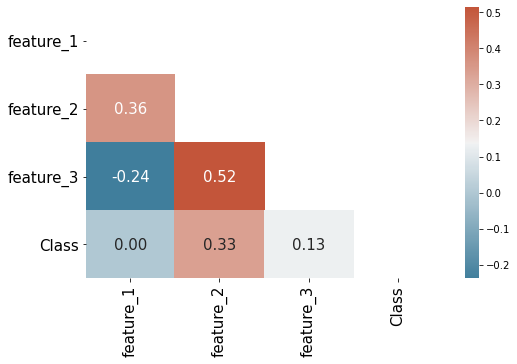

In [35]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

mask = np.triu(np.ones_like(data[continuous_features + ['Class']].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data[continuous_features + ['Class']].corr(), annot=True, fmt='.2f', 
            mask=mask, cmap=cmap, annot_kws={'size': 15}, ax=ax)

ax.set_xticks([0.5,1.5,2.5,3.5])
ax.set_xticklabels(continuous_features + ['Class'], fontsize=15, rotation=90)
ax.set_yticks([0.5,1.5,2.5,3.5])
ax.set_yticklabels(continuous_features + ['Class'], fontsize=15, rotation=360);

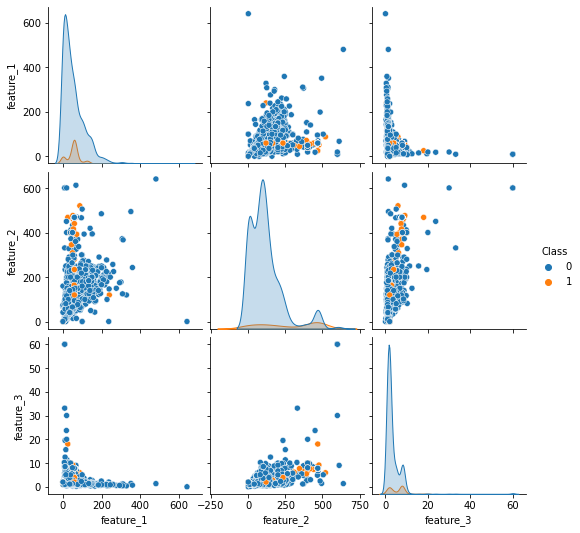

In [36]:
sns.pairplot(data[continuous_features + ['Class']], hue='Class');

# Predicting the anomalies

In this section I will use three different approaches to predict the anomalies for an unbalanced dataset. The variables of the dataset will be the outcome of the chi-squared plus the continuous features. In general, I employ 6 algorithms, Logistic Regression - Decision Trees - Extra Trees - Gradient Boosting - Random Forest - kNN.

- **<u>Method 1</u>: Following the conventional method**

    -> Split the data into 33.3% test and rest training
    
    -> Employ GridSearchCV to tune hyperparameters for the algorithms that I need to use. Scoring metric is f1-score. Tune the hyperparameters in the splitted dataset. For the classifiers which include the option of weighted classes, I include it.
    
    -> Select the best estimator and use cross_val_predict in a 10 times folded dataset to make some statistics for the best_estimator of each algorithm.
    
    -> Select the model based on f1-score and store the predicted values in a new column.
    
    -> Using the best scoring model, re-train the model by removing the weighted classes parameter and store the predicted values in a new column.
    
    

- **<u>Method 2</u>: Employing an experiment by resizing the classes of the target variable**
    
    This approach is mainly an experiment. I resize manually the majority class of the dataset into steps. I start with a ratio of 1:1, continue with 1.5:1 - 2:1 - 2.5:1 - 3:1 .... and stop at the 10:1. Here, I use again the GridSearchCV to tune the hyperparameters but I do not include the the option of weighted classes as parameter of the classifiers. I select the best model based on the f1-score and store the predicted values in a new column of the dataset.


- **<u>Method 3</u>: Reduce the dimensions using FactorAnalysis and follow the conventional method**

    In this approach I reduce the dimensions by using the FactorAnalysis. I use this method because 23 out of 26 features are binary and PCA is not recommended for such cases. As threshold I take the 80% of the cumulative explained variances. I continue with the protocol which was described in the first method. I select the best model based on the f1-score and store the predicted values in a new column of the dataset.
    
    
Here, one could also use the BalancedBaggingClassifier from the imblearn.ensemble.


Before I apply any of the described approaches, I will have to scale the data. The majority of the features are binary variables whereas only 3 are continuous. Thus, I will apply StandardScaler to the continuous features and then MinMaxScaler to scale them based on the values of the binary one. 

<u>Metrics</u>

In general, in classification problem people are using the accuracy as metrics. For an unbalanced dataset, this metric can mislead. Thus, good metrics are the precision, recall or a combination of those two, the f1-score. Thus, the basic metric is the f1-score.

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/


https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

**Data preparation based on the features selection**

In [37]:
data_for_predictions = data[continuous_features + data.columns[np.where(scores_chi>=1)].tolist() + ['Class']]

**Scale the data**

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
mm = MinMaxScaler()

for col in data_for_predictions.columns[:3]:
    ss.fit(data_for_predictions[col].to_numpy().reshape(-1,1))
    data_for_predictions[col] = ss.transform(data_for_predictions[col].to_numpy().reshape(-1,1))
    data_for_predictions[col] = mm.fit_transform(data_for_predictions[col].to_numpy().reshape(-1,1)).reshape(1,-1)[0]

<ipython-input-38-a24641ad3640>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_predictions[col] = ss.transform(data_for_predictions[col].to_numpy().reshape(-1,1))
<ipython-input-38-a24641ad3640>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_predictions[col] = mm.fit_transform(data_for_predictions[col].to_numpy().reshape(-1,1)).reshape(1,-1)[0]
<ipython-input-38-a24641ad3640>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [39]:
data_for_predictions.head()

,feature_1,feature_2,feature_3,feature_13,feature_345,feature_954,feature_1044,feature_1048,feature_1110,feature_1137,...,feature_1397,feature_1405,feature_1419,feature_1420,feature_1433,feature_1453,feature_1481,feature_1511,feature_1530,Class
0,0.154930,0.248826,0.026642,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.029734,0.128326,0.069143,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.153365,0.233177,0.025227,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.061033,0.061033,0.016642,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.017214,0.364632,0.324983,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data_for_predictions.describe()

,feature_1,feature_2,feature_3,feature_13,feature_345,feature_954,feature_1044,feature_1048,feature_1110,feature_1137,...,feature_1397,feature_1405,feature_1419,feature_1420,feature_1433,feature_1453,feature_1481,feature_1511,feature_1530,Class
count,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,...,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000
mean,0.082927,0.199143,0.056078,0.006414,0.005831,0.009913,0.033236,0.033819,0.005248,0.165598,...,0.003499,0.005248,0.006414,0.003499,0.009329,0.006997,0.005248,0.005248,0.020991,0.083382
std,0.087919,0.202000,0.066147,0.079853,0.076160,0.099096,0.179305,0.180816,0.072273,0.371828,...,0.059062,0.072273,0.079853,0.059062,0.096165,0.083380,0.072273,0.072273,0.143397,0.276539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.017214,0.061033,0.020809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.061033,0.151800,0.033309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.116588,0.250391,0.076771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- ##  <u>Method 1</u>: Following the conventional method

**Split the data**

In [41]:
X, y = data_for_predictions.iloc[:,:-1], data_for_predictions.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Libraries for the models**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

#model selection
from sklearn.model_selection import GridSearchCV, cross_val_score

#metrics
from sklearn.metrics import confusion_matrix, roc_curve

**Algorithms**

In [43]:
parameters = {'penalty':['l1','l2'],
              'C': [0.001, 0.01, 0.1, 1]}
# Logistic Regression
GD_LR = GridSearchCV(LogisticRegression(solver='liblinear'),
                        param_grid=parameters, 
                        scoring='f1')

#Decision Trees
parameters = {'max_leaf_nodes': [i for i in range(2,10)],
              'max_depth': [i for i in range(2,10)]}
    
GD_DT = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Extra Trees
GD_ET = GridSearchCV(ExtraTreesClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Random Forest
GD_RF = GridSearchCV(RandomForestClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Gradient Boosting
GD_GB = GridSearchCV(GradientBoostingClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#k-NN
parameters = {'n_neighbors': [i for i in range(5,35,5)]}
GD_kNN = GridSearchCV(KNeighborsClassifier(),
                      param_grid=parameters, 
                      scoring='f1')


models = {'Logistic_Regression': GD_LR,
          'kNN': GD_kNN,
          'Decision_Trees': GD_DT,
          'Extra_Trees': GD_ET,
          'Random_Forest': GD_RF,
          'Gradient_Boosting': GD_GB}

**Avoid the warnings**

In [44]:
import warnings
warnings.filterwarnings("ignore")

**Train the models**

In [45]:
results_col = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC', 'F1-score']
results = pd.DataFrame(columns=results_col)

l = 0

accuracy_models_opt, precision_models_opt, recall_models_opt = [], [], []
roc_auc_models_opt, f1_score_models_opt = [], []
best_estimator = {}

for name, model in models.items():
    print(name)
    model.fit(X_train,y_train)
    
    accuracy = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='accuracy')
    accuracy_models_opt.append(accuracy)    
    precision = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='precision')
    precision_models_opt.append(precision)
    recall = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='recall')
    recall_models_opt.append(recall)
    roc_auc = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='roc_auc')
    roc_auc_models_opt.append(roc_auc)
    f1 = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='f1')
    f1_score_models_opt.append(roc_auc)
    
    best_estimator[name] = model.best_estimator_
    
    results.loc[l] = [name,
                      '%s $\pm$ %s' %(round(accuracy.mean()*100,2),round(accuracy.std()*100,2)),
                      '%s $\pm$ %s' %(round(precision.mean()*100,2),round(precision.std()*100,2)),
                      '%s $\pm$ %s' %(round(recall.mean()*100,2),round(recall.std()*100,2)),
                      '%s $\pm$ %s' %(round(roc_auc.mean()*100,2),round(roc_auc.std()*100,2)),
                      '%s $\pm$ %s' %(round(f1.mean()*100,2),round(f1.std()*100,2))]
    l += 1

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting


Let's see the results

In [46]:
results

,Classifier,Accuracy,Precision,Recall,ROC-AUC,F1-score
0,Logistic_Regression,91.43 $\pm$ 0.98,47.54 $\pm$ 14.86,18.95 $\pm$ 7.96,82.67 $\pm$ 6.55,26.46 $\pm$ 9.63
1,kNN,91.6 $\pm$ 1.25,50.43 $\pm$ 6.86,44.05 $\pm$ 11.34,85.49 $\pm$ 5.53,46.1 $\pm$ 7.99
2,Decision_Trees,89.45 $\pm$ 1.99,41.85 $\pm$ 7.83,65.05 $\pm$ 10.21,79.16 $\pm$ 4.64,50.78 $\pm$ 8.45
3,Extra_Trees,90.09 $\pm$ 1.96,43.17 $\pm$ 4.12,64.95 $\pm$ 10.94,83.45 $\pm$ 6.2,53.72 $\pm$ 8.73
4,Random_Forest,89.74 $\pm$ 1.97,41.97 $\pm$ 6.79,65.05 $\pm$ 9.16,88.1 $\pm$ 3.47,52.63 $\pm$ 7.67
5,Gradient_Boosting,92.54 $\pm$ 1.16,62.13 $\pm$ 19.05,30.71 $\pm$ 9.22,87.66 $\pm$ 4.94,40.35 $\pm$ 9.91


Let's plot the boxplots of eac classifier and for each scoring metrics

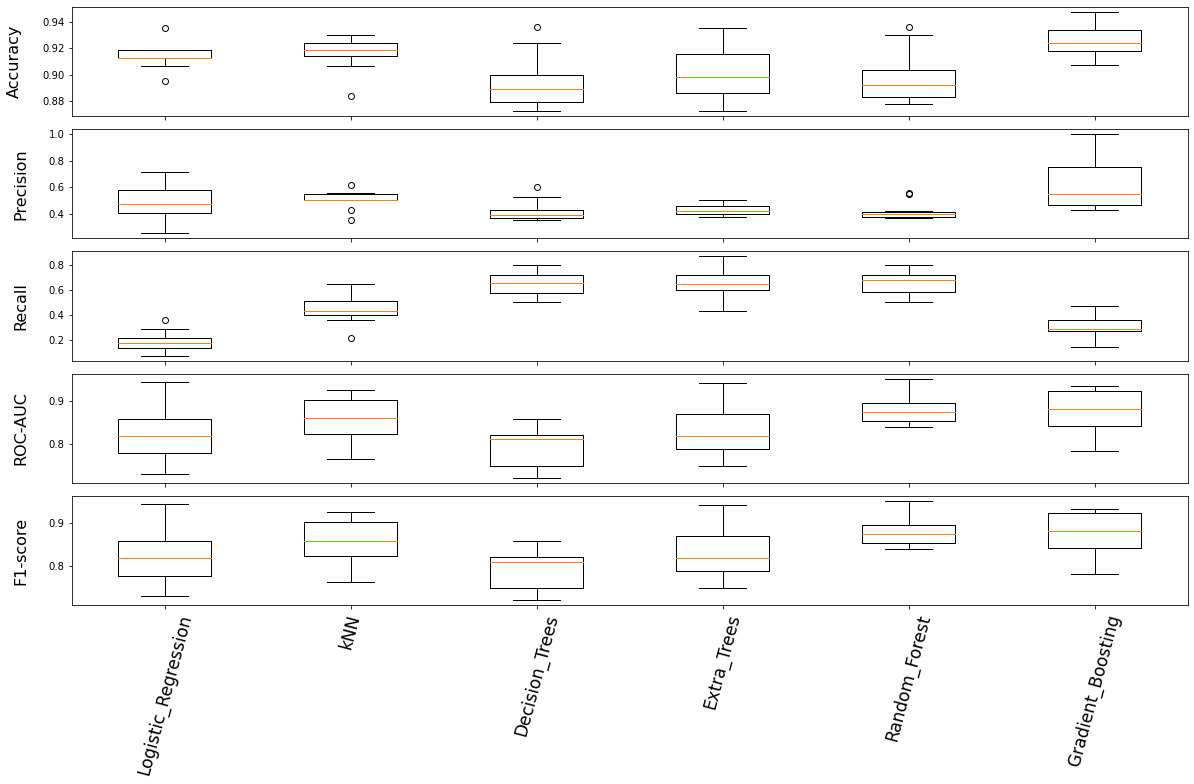

In [47]:
fig, ax = plt.subplots(5, 1, figsize=(20,11))
plt.subplots_adjust(hspace=0.12)

ax[0].boxplot(accuracy_models_opt)
ax[1].boxplot(precision_models_opt)
ax[2].boxplot(recall_models_opt)
ax[3].boxplot(roc_auc_models_opt)
ax[4].boxplot(f1_score_models_opt)

ax[0].set_ylabel('Accuracy', labelpad=20, fontsize=16)
ax[1].set_ylabel('Precision', labelpad=20, fontsize=16)
ax[2].set_ylabel('Recall', labelpad=20, fontsize=16)
ax[3].set_ylabel('ROC-AUC', labelpad=20, fontsize=16)
ax[4].set_ylabel('F1-score', labelpad=20, fontsize=16)

xticks = np.arange(1,7)
for i in range(len(ax)):
    if i==4:
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels(models.keys(), fontsize=17, rotation=75)
    else:
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels('');

I select 4 best models based on the highest result of the respective metrics. If a model is already included, I choose the next model.

In [48]:
metrics_used = ['Accuracy', 'Precision', 'Recall', 'F1-score']

specific_models = []

for x in metrics_used:
    which_algorith = results.sort_values(x, ascending=False).iloc[0,0]
    if x!='Accuracy':
        if which_algorith in specific_models:
            i=1
            while which_algorith in specific_models:
                which_algorith = results.sort_values(x, ascending=False).iloc[i,0]
                if which_algorith in specific_models:
                    i+=1
                else:
                    specific_models.append(which_algorith)
                    break
        else:
            specific_models.append(which_algorith)
    else:
        specific_models.append(which_algorith)
        

specific_models

['Gradient_Boosting', 'kNN', 'Random_Forest', 'Extra_Trees']

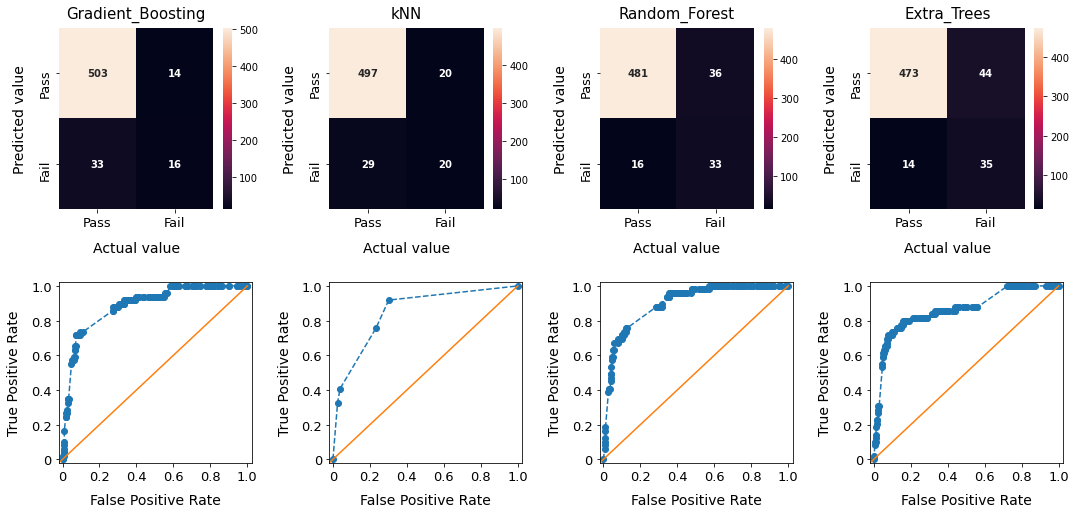

In [49]:
fig, ax = plt.subplots(2, 4, figsize=(18,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                         Confusion Matrix                                            #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################

i = 0
for name in specific_models:
    y_pred = models[name].best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)

    sns.heatmap(cm, annot=True, annot_kws={"size": 10, "weight": "bold"}, fmt='g', ax=ax[0,i])
    
    ticks=['Pass', 'Fail']
    ax[0,i].set_yticklabels(ticks, fontsize=13)
    ax[0,i].set_xticklabels(ticks, fontsize=13)
    ax[0,i].set_xlabel('Actual value', labelpad=12, fontsize=14)
    ax[0,i].set_ylabel('Predicted value', labelpad=12, fontsize=14)
    
    ax[0,i].set_title(specific_models[i], y=1.02, fontsize=15)
    i+=1

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                           ROC curve                                                 #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################


i = 0
for name in specific_models:
    probs = models[name].best_estimator_.predict_proba(X_test) 
    probs = probs[:, 1] 
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, probs)
    
    ax[1,i].plot(rf_fpr, rf_tpr, '--o')
    ax[1,i].plot([-0.02,1.],[-0.02,1.], '-')
    
    ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    ax[1,i].set_xticks(ticks)
    ax[1,i].set_xticklabels(ticks, fontsize=13)

    ax[1,i].set_yticks(ticks)
    ax[1,i].set_yticklabels(ticks, fontsize=13)

    ax[1,i].set_xlim(-0.02,1.025)
    ax[1,i].set_ylim(-0.02,1.025)

    ax[1,i].set_xlabel('False Positive Rate', fontsize=14, labelpad=10)
    ax[1,i].set_ylabel('True Positive Rate', fontsize=14, labelpad=10)
    
    i+=1;

**Feature importances**

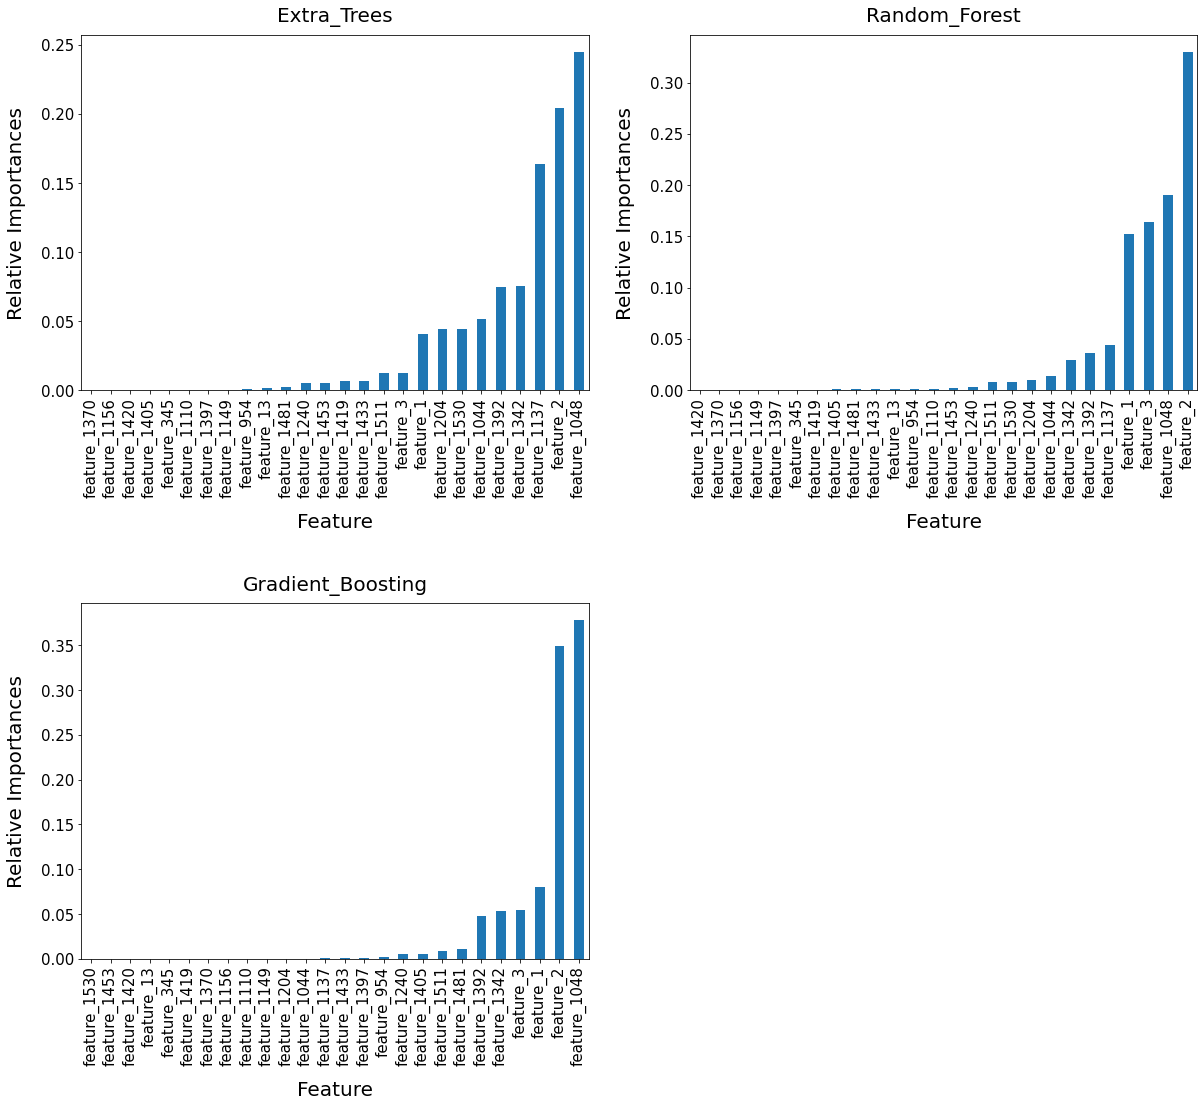

In [50]:
fig, ax = plt.subplots(2,2,figsize=(20,17))
plt.subplots_adjust(hspace=0.6)
ax = ax.flatten()
ax[3].axis('off')

for i, name in enumerate(['Extra_Trees','Random_Forest','Gradient_Boosting']):
    best_model = models[name].best_estimator_
    feature_importances = pd.Series(best_model.feature_importances_,
                                    data_for_predictions.columns[:-1]).sort_values(ascending=True)

    feature_importances.plot(kind='bar', fontsize=15, ax=ax[i])
    ax[i].set_xlabel('Feature', labelpad=15, fontsize=20)
    ax[i].set_ylabel('Relative Importances', labelpad=15, fontsize=20)
    ax[i].set_title(name, y=1.02, fontsize=20);

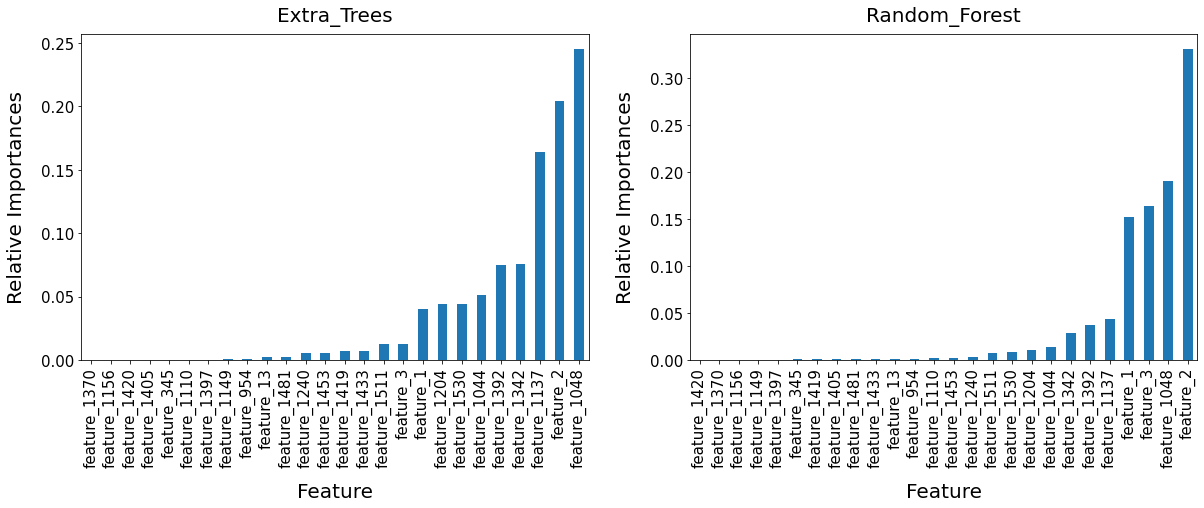

In [51]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

for i, name in enumerate(['Extra_Trees','Random_Forest']):
    best_model = models[name].best_estimator_
    feature_importances = pd.Series(best_model.feature_importances_,
                                    data_for_predictions.columns[:-1]).sort_values(ascending=True)

    feature_importances.plot(kind='bar', fontsize=15, ax=ax[i])
    ax[i].set_xlabel('Feature', labelpad=15, fontsize=20)
    ax[i].set_ylabel('Relative Importances', labelpad=15, fontsize=20)
    ax[i].set_title(name, y=1.02, fontsize=20);

Let's find out the optimal model based on the F1-score: 

In [52]:
which_algorithm = results[results['F1-score']==results['F1-score'].max()]['Classifier']
best_model_method_1 = best_estimator[which_algorithm.values[0]]

results[results['F1-score']==results['F1-score'].max()]

,Classifier,Accuracy,Precision,Recall,ROC-AUC,F1-score
3,Extra_Trees,90.09 $\pm$ 1.96,43.17 $\pm$ 4.12,64.95 $\pm$ 10.94,83.45 $\pm$ 6.2,53.72 $\pm$ 8.73


The best performed classifier had taken a parameter which is helpful to balance the weights when the target variable is imbalanced, the class_weight='balanced'. Before I store the predictions in a new column of the dataset, I would like to check how would be result if this parameter is missing...

In [53]:
parameters = {'max_leaf_nodes': [i for i in range(2,10)],
              'max_depth': [i for i in range(2,10)]}
    
#Extra Trees
GD_ET = GridSearchCV(ExtraTreesClassifier(),
                     param_grid=parameters, 
                     scoring='f1')


GD_ET.fit(X_train,y_train)
model_without_weights = GD_ET.best_estimator_

Store the predictions into a new column. Firstly, copy the data into a new variable in order to store the predictions.

In [54]:
data_method_predictions = data_for_predictions.copy()

In [55]:
predictions_without_weights = model_without_weights.predict(X)
data_method_predictions["Pred. without weights"] = predictions_without_weights

predictions_method_1 = best_model_method_1.predict(X)
data_method_predictions["Pred. Method 1"] = predictions_method_1

Let's see the classification report for the best model to whole dataset.

In [56]:
from sklearn.metrics import classification_report

print('Using the principle of method 1')
print()
print(classification_report(data_method_predictions.Class,data_method_predictions["Pred. Method 1"]))
print('-'*60)
print('-'*60)
print()
print('Best estimator of method 1 without weights')
print()
print(classification_report(data_method_predictions.Class,data_method_predictions["Pred. without weights"]))

Using the principle of method 1

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1572
           1       0.45      0.69      0.54       143

    accuracy                           0.90      1715
   macro avg       0.71      0.80      0.74      1715
weighted avg       0.93      0.90      0.91      1715

------------------------------------------------------------
------------------------------------------------------------

Best estimator of method 1 without weights

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1572
           1       0.75      0.04      0.08       143

    accuracy                           0.92      1715
   macro avg       0.83      0.52      0.52      1715
weighted avg       0.91      0.92      0.88      1715



- ## <u>Method 2</u>: Employing an experiment by resizing the classes of the target variable



In [57]:
parameters = {'penalty':['l1','l2'],
              'C': [0.001, 0.01, 0.1, 1]}
# Logistic Regression
GD_LR = GridSearchCV(LogisticRegression(solver='liblinear'),
                        param_grid=parameters, 
                        scoring='f1')

#Decision Trees
parameters = {'max_leaf_nodes': [i for i in range(2,10)],
              'max_depth': [i for i in range(2,10)]}
    
GD_DT = GridSearchCV(DecisionTreeClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#Extra Trees
GD_ET = GridSearchCV(ExtraTreesClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#Random Forest
GD_RF = GridSearchCV(RandomForestClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#Gradient Boosting
GD_GB = GridSearchCV(GradientBoostingClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#k-NN
parameters = {'n_neighbors': [i for i in range(5,35,5)]}
GD_kNN = GridSearchCV(KNeighborsClassifier(),
                      param_grid=parameters, 
                      scoring='f1')


models = {'Logistic_Regression': GD_LR,
          'kNN': GD_kNN,
          'Decision_Trees': GD_DT,
          'Extra_Trees': GD_ET,
          'Random_Forest': GD_RF,
          'Gradient_Boosting': GD_GB}

In [58]:
import random

size = [1,1.5,2,2.5,3,3.5,5,7.5,10]

accuracy_per_size, precision_per_size, recall_per_size = [], [], []
roc_auc_per_size, f1_per_size = [], []
best_estimator_per_size = []

experiment, classes_size = [], []

print('-'*35)
for s in size:
    print('Class Pass ->', s, ': 1 <- Class Fail')
    print()
    ind_class_1 = data_for_predictions[data_for_predictions.Class==1].index.tolist()
    ind_class_0 = random.choices(data_for_predictions[data_for_predictions.Class==0].index, k=int(s*len(ind_class_1)))
    which_ind = ind_class_1 + ind_class_0
    
    random.shuffle(which_ind)
    
    X, y = data_for_predictions.iloc[which_ind,:-1], data_for_predictions.iloc[which_ind,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    classes_size.append(round((y.value_counts()/y.count())*100,2).values)
    
    results_col = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC', 'F1-score']
    results = pd.DataFrame(columns=results_col)

    l = 0

    accuracy_models_opt, precision_models_opt, recall_models_opt = [], [], []
    roc_auc_models_opt, f1_score_models_opt = [], []
    best_estimator = []
    
    for name, model in models.items():
        print(name)
        model.fit(X_train,y_train)
        
        best_estimator.append(model.best_estimator_)
    
        accuracy = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='accuracy')
        accuracy_models_opt.append(accuracy)    
        precision = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='precision')
        precision_models_opt.append(precision)
        recall = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='recall')
        recall_models_opt.append(recall)
        roc_auc = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='roc_auc')
        roc_auc_models_opt.append(roc_auc)
        f1 = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='f1')
        f1_score_models_opt.append(roc_auc)
    
        results.loc[l] = [name,
                          '%s $\pm$ %s' %(round(accuracy.mean()*100,2),round(accuracy.std()*100,2)),
                          '%s $\pm$ %s' %(round(precision.mean()*100,2),round(precision.std()*100,2)),
                          '%s $\pm$ %s' %(round(recall.mean()*100,2),round(recall.std()*100,2)),
                          '%s $\pm$ %s' %(round(roc_auc.mean()*100,2),round(roc_auc.std()*100,2)),
                          '%s $\pm$ %s' %(round(f1.mean()*100,2),round(f1.std()*100,2))]
        l += 1
        
    experiment.append(results)
    
    best_estimator_per_size.append(best_estimator)
    
    accuracy_per_size.append(accuracy_models_opt)
    precision_per_size.append(precision_models_opt)
    recall_per_size.append(recall_models_opt)
    roc_auc_per_size.append(roc_auc_models_opt)
    f1_per_size.append(f1_score_models_opt)
    
    print('-'*35)

-----------------------------------
Class Pass -> 1 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 1.5 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 2 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 2.5 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 3 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 3.5 : 1 <- Class Fail

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting
-----------------------------------
Class Pass -> 5 : 1 <- Class Fail


In [59]:
j = 0
for name, _ in models.items():
    results_per_classifier = []
    for i in range(len(experiment)):
        results_per_classifier.append([size[i],classes_size[i][0],classes_size[i][1],
                                       round(accuracy_per_size[i][j].mean()*100,2),
                                       round(precision_per_size[i][j].mean()*100,2),
                                       round(recall_per_size[i][j].mean()*100,2),
                                       round(roc_auc_per_size[i][j].mean()*100,2),
                                       round(f1_per_size[i][j].mean()*100,2)])
        
    globals()[f"{name}_results"] = pd.DataFrame(results_per_classifier, columns=['Ratio Pass:Fail','Percentage Pass',
                                                                                 'Percentage Fail','Accuracy',
                                                                                 'Precision','Recall','ROC-AUC',
                                                                                 'F1-score'])
    j+=1

In [60]:
algorithms_results = {'Logistic Regression': Logistic_Regression_results, 
                      'kNN': kNN_results, 
                      'Decision_Trees': Decision_Trees_results,
                      'Extra_Trees': Extra_Trees_results, 
                      'Random_Forest': Random_Forest_results, 
                      'Gradient_Boosting': Gradient_Boosting_results}

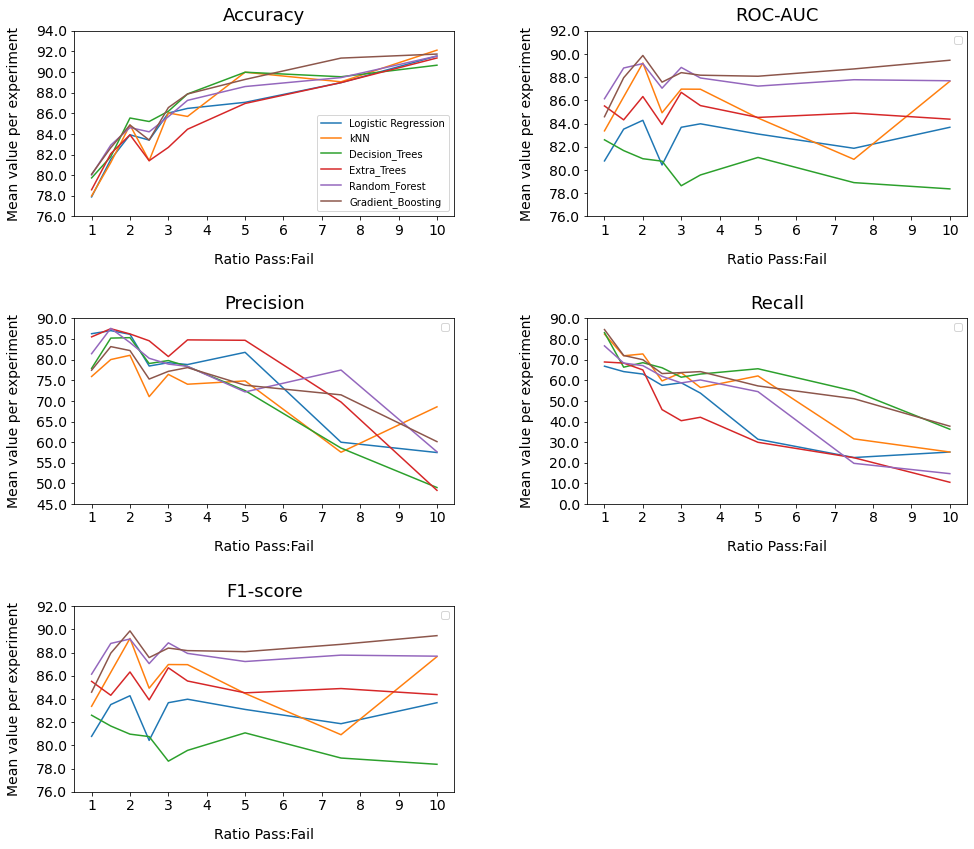

In [61]:
fig, ax = plt.subplots(3,2,figsize=(16,14))
plt.subplots_adjust(wspace=0.35,hspace=0.55)
ax[2,1].axis('off')

for algorithm_name, results in algorithms_results.items():
    results.plot(x='Ratio Pass:Fail',y='Accuracy', ax=ax[0,0], label=algorithm_name)
    results.plot(x='Ratio Pass:Fail',y='ROC-AUC', ax=ax[0,1], label=algorithm_name)
    results.plot(x='Ratio Pass:Fail',y='Precision', ax=ax[1,0], label=algorithm_name)
    results.plot(x='Ratio Pass:Fail',y='Recall', ax=ax[1,1], label=algorithm_name)
    results.plot(x='Ratio Pass:Fail',y='F1-score', ax=ax[2,0], label=algorithm_name)
    
ax[0,0].set_title('Accuracy', y=1.02, fontsize=18)
ax[0,1].set_title('ROC-AUC', y=1.02, fontsize=18)
ax[1,0].set_title('Precision', y=1.02, fontsize=18)
ax[1,1].set_title('Recall', y=1.02, fontsize=18)
ax[2,0].set_title('F1-score', y=1.02, fontsize=18)


x_ticks = [x for x in range(1,11)]
for i in range(3):
    for j in range(2):
        ax[i,j].set_xticks(x_ticks)
        ax[i,j].set_xticklabels(x_ticks, fontsize=14)
        ax[i,j].set_xlabel('Ratio Pass:Fail', labelpad=15, fontsize=14)
        ax[i,j].set_ylabel('Mean value per experiment', labelpad=15, fontsize=14)
        
        y_ticks = ax[i,j].get_yticks()
        ax[i,j].set_yticks(y_ticks)
        ax[i,j].set_yticklabels(y_ticks, fontsize=14)
        
        
ax[0,1].legend('')
ax[1,0].legend('')
ax[1,1].legend('')
ax[2,0].legend('');

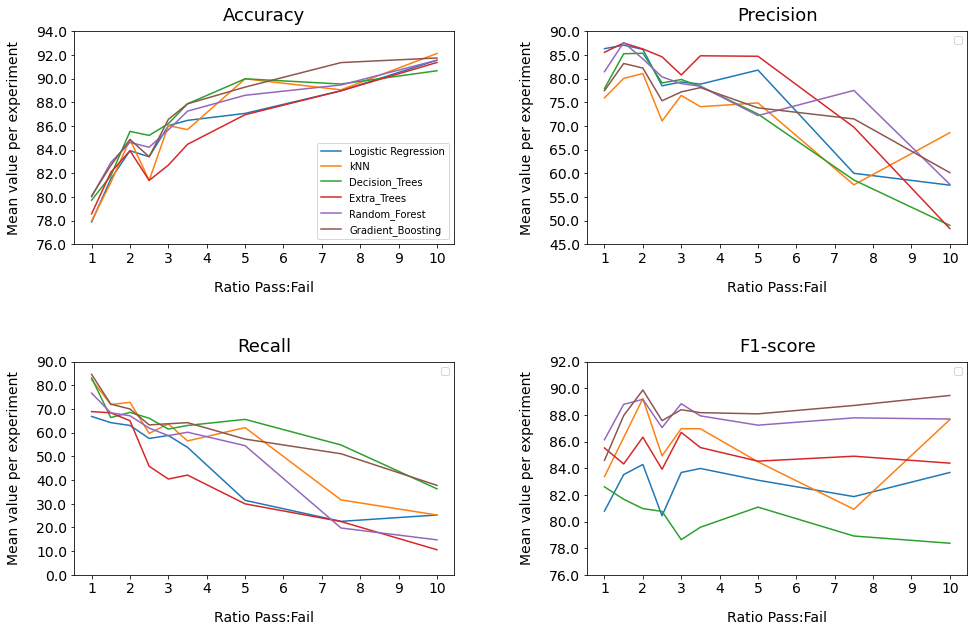

In [62]:
fig, ax = plt.subplots(2,2,figsize=(16,10))
plt.subplots_adjust(wspace=0.35,hspace=0.55)

for algorithm_name, results in algorithms_results.items():
    results.plot(x='Ratio Pass:Fail',y='Accuracy', ax=ax[0,0], label=algorithm_name)
    results.plot(x='Ratio Pass:Fail',y='Precision', ax=ax[0,1], label=algorithm_name)
    results.plot(x='Ratio Pass:Fail',y='Recall', ax=ax[1,0], label=algorithm_name)
    results.plot(x='Ratio Pass:Fail',y='F1-score', ax=ax[1,1], label=algorithm_name)
    
ax[0,0].set_title('Accuracy', y=1.02, fontsize=18)
ax[0,1].set_title('Precision', y=1.02, fontsize=18)
ax[1,0].set_title('Recall', y=1.02, fontsize=18)
ax[1,1].set_title('F1-score', y=1.02, fontsize=18)


x_ticks = [x for x in range(1,11)]
for i in range(2):
    for j in range(2):
        ax[i,j].set_xticks(x_ticks)
        ax[i,j].set_xticklabels(x_ticks, fontsize=14)
        ax[i,j].set_xlabel('Ratio Pass:Fail', labelpad=15, fontsize=14)
        ax[i,j].set_ylabel('Mean value per experiment', labelpad=15, fontsize=14)
        
        y_ticks = ax[i,j].get_yticks()
        ax[i,j].set_yticks(y_ticks)
        ax[i,j].set_yticklabels(y_ticks, fontsize=14)
        
        
ax[0,1].legend('')
ax[1,0].legend('')
ax[1,1].legend('');

**Features importances**

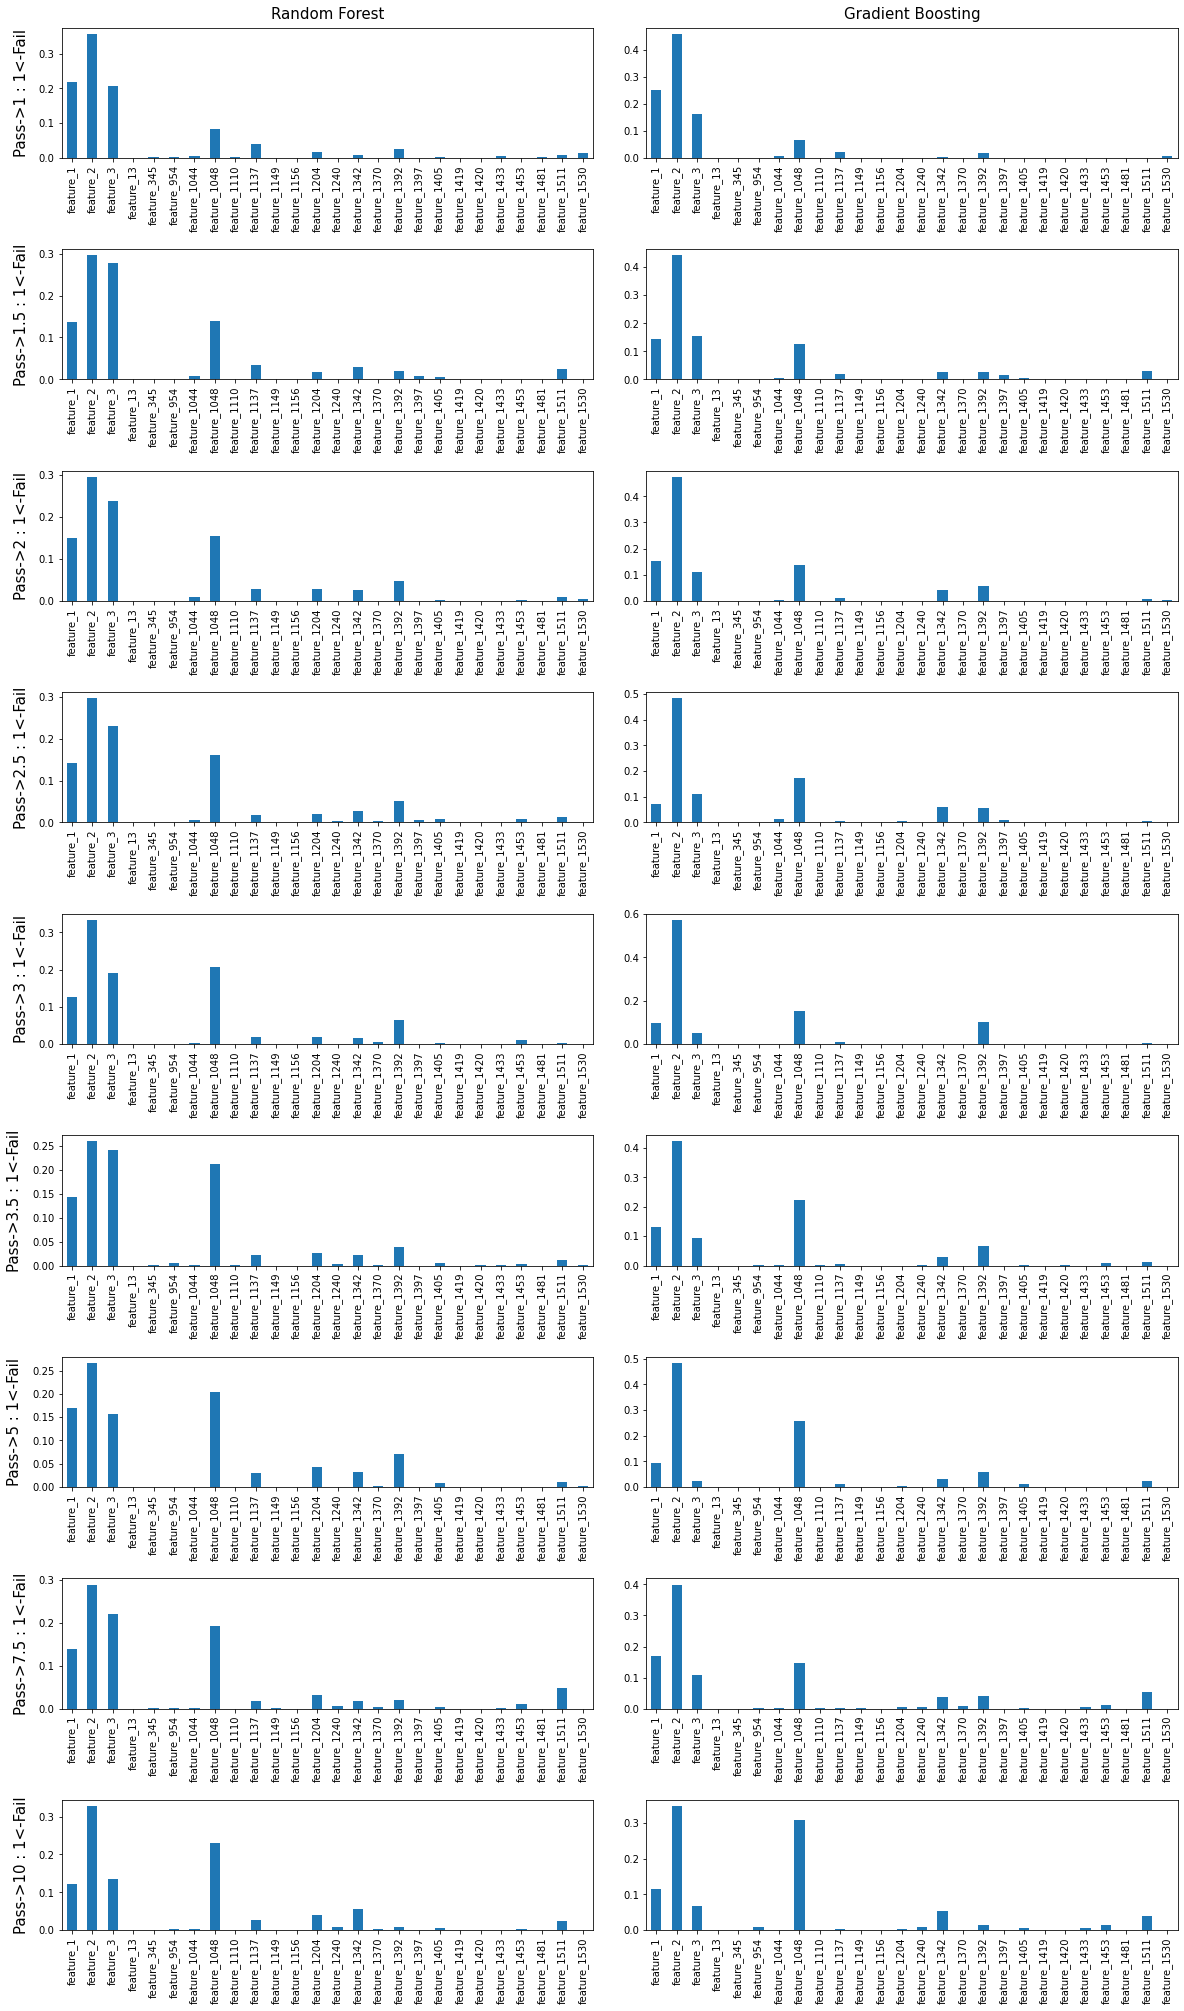

In [63]:
fig, ax = plt.subplots(9,2,figsize=(20,35))
plt.subplots_adjust(hspace=0.7, wspace=0.1)

for i in range(len(size)):
    
    rf = best_estimator_per_size[i][4]
    gb = best_estimator_per_size[i][5]
    
    best_model = [rf,gb]
    for j in range(2):        
        feature_importances = pd.Series(best_model[j].feature_importances_,
                                        data_for_predictions.columns[:-1])#.sort_values(ascending=True)

        feature_importances.plot(kind='bar', fontsize=10, ax=ax[i,j])
        
        if j==0:
            ax[i,j].set_ylabel('Pass->%s : 1<-Fail' %(size[i]), labelpad=10, fontsize=15)
        
ax[0,0].set_title('Random Forest', y=1.02, fontsize=15)
ax[0,1].set_title('Gradient Boosting', y=1.02, fontsize=15);

Let's find out the optimal model:

In [64]:
searching_optimal_f1, store_algorithm = [], []
for algorithm_name, results in algorithms_results.items():
    searching_optimal_f1.append(results['F1-score'].values)
    
algorithm, exp_sample = np.where(np.array(searching_optimal_f1)==np.array(searching_optimal_f1).max())

best_model_method_2 = best_estimator_per_size[exp_sample[0]][algorithm[0]]
best_model_method_2

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=6)

In [65]:
print('The best estimator is given by %s.' %best_model_method_2)
print()
print('The ratio is Class Pass -> %s : 1 <- Class Fail' %size[exp_sample[0]])

The best estimator is given by GradientBoostingClassifier(max_depth=5, max_leaf_nodes=6).

The ratio is Class Pass -> 2 : 1 <- Class Fail


Store the predictions into a new column.

In [66]:
predictions_method_2 = best_model_method_2.predict(data_for_predictions.iloc[:,:-1])
data_method_predictions["Pred. Method 2"] = predictions_method_2

### Conclusions

This method was mainly an experiment in order to see how the size of the majority class play a role in the result. Precision and Recall are decreasing while the size of the majority class increases. On the one hand, the F1-score, the basic metric,  indicates decrease for some models while the sample of the majority class increases, and the  optimal algorithm, the GradientBoostingClassifier, shows a stability on the other hand. The features importances points out that the continunous features and the feature_1048 are important independent variables for the model.

- ## <u>Method 3</u>: Reduce the dimensions using FactorAnalysis and employing classifiers with 

Sort the correlated features to the target variable based on the kendall method. I sort them and give them to the FactorAnalysis.

In [67]:
row_of_columns = data_for_predictions[data_for_predictions.columns[:-1]].corrwith(data_for_predictions.Class, method='kendall').sort_values(ascending=False).index.tolist()
row_of_columns

['feature_1048',
 'feature_2',
 'feature_1204',
 'feature_1392',
 'feature_3',
 'feature_1342',
 'feature_1511',
 'feature_1',
 'feature_1405',
 'feature_1453',
 'feature_1370',
 'feature_1240',
 'feature_1156',
 'feature_954',
 'feature_1149',
 'feature_1397',
 'feature_1420',
 'feature_1110',
 'feature_1481',
 'feature_345',
 'feature_1419',
 'feature_13',
 'feature_1433',
 'feature_1530',
 'feature_1044',
 'feature_1137']

**Applying FactorAnalysis to reduce the dimensionality**

In [68]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=len(data_for_predictions[row_of_columns]))
fa.fit_transform(data_for_predictions[row_of_columns])

array([[ 0.07270904, -0.3500975 , -0.15344988, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63152488,  0.26384258, -0.60607979, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04152777, -0.35491067, -0.14272844, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.23993697, -0.2725738 , -0.19494719, ...,  0.        ,
         0.        ,  0.        ],
       [-0.14408734,  0.16878662,  0.06980394, ...,  0.        ,
         0.        ,  0.        ],
       [-0.44246246, -0.82040269, -0.15803061, ...,  0.        ,
         0.        ,  0.        ]])

**Calculate the explained variance**

In [69]:
m = fa.components_

m1 = m**2
m2 = np.sum(m1,axis=1)

components_var = []
for i in range(len(m2)):
    components_var.append((m2[i]*100)/np.sum(m2))

In [70]:
fa_components = ["Component_%i"%i for i in range(1,len(row_of_columns)+1)]

Let's create a pandas series and sort the values to see the distribution.

In [71]:
components_distr_features = pd.Series(components_var, index=fa_components).sort_values(ascending=False)
components_distr_features

Component_1     36.171794
Component_2     31.360822
Component_4     16.555616
Component_3     10.110742
Component_5      2.649714
Component_6      0.924589
Component_7      0.915961
Component_8      0.634022
Component_9      0.239875
Component_10     0.137076
Component_11     0.126270
Component_12     0.057310
Component_13     0.045816
Component_14     0.032289
Component_15     0.021241
Component_16     0.015949
Component_17     0.000915
Component_18     0.000000
Component_19     0.000000
Component_20     0.000000
Component_21     0.000000
Component_22     0.000000
Component_23     0.000000
Component_24     0.000000
Component_25     0.000000
Component_26     0.000000
dtype: float64

In [72]:
cumulative_distributions = []
for i, x in enumerate(components_distr_features.values):
    summa = np.array(components_distr_features.values[:i+1]).sum()
    cumulative_distributions.append(summa)

In [73]:
cumulative_distributions

[36.17179385150387,
 67.53261548328518,
 84.08823178461736,
 94.19897409825595,
 96.84868812952824,
 97.77327696590733,
 98.68923779186454,
 99.32325935292488,
 99.56313456748751,
 99.70021087384022,
 99.82648067081276,
 99.88379092107674,
 99.92960732274896,
 99.96189592270649,
 99.98313656758684,
 99.99908520585745,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.99999999999999,
 99.99999999999999,
 99.99999999999999]

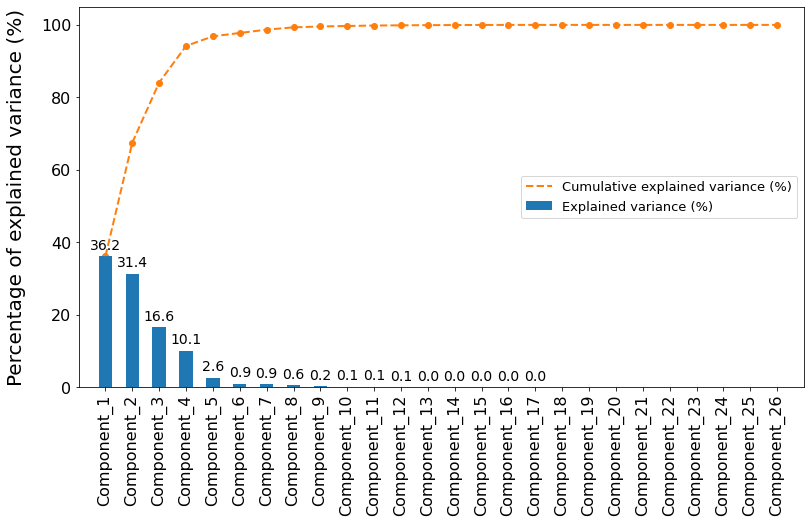

In [74]:
fig, ax = plt.subplots(1,1,figsize=(13,7))

pos = np.arange(len(cumulative_distributions))
components_distr_features.plot.bar(ax=ax, width=0.5, color='tab:blue', label='Explained variance (%)')
ax.plot(pos, cumulative_distributions, color='tab:orange', ls='--', 
        linewidth=2, label='Cumulative explained variance (%)')
ax.scatter(pos, cumulative_distributions, color='tab:orange')

ax.legend(loc='center right', fontsize=13)

ax.set_xlim(-1,len(row_of_columns))
ax.set_xticks(pos)
ax.set_xticklabels(fa_components, fontsize=16, rotation=90)
yticks = np.arange(0,120,20)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=16)

ax.set_ylabel('Percentage of explained variance (%)', fontsize=20, labelpad=15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height!=0:
        ax.text(x+width-0.25, y+height+3, '{:.1f}'.format(height), 
                horizontalalignment='center', verticalalignment='center', fontsize=14);

Select the features based on the 80% threshold.

In [75]:
number_of_components = 1
summa = 0
i = 0
while summa<80:
    summa = summa + cumulative_distributions[i]
    i+=1
    
number_of_components = number_of_components + i

print('I must use %s components.' %number_of_components)

I must use 3 components.


**Apply the threshold of 80% and select the number of components. This means that I can take the first 3.**

Let's create the dataset based on the new variables, the Factor Analysis components.

In [76]:
fa = FactorAnalysis(n_components=number_of_components)
X_fa = fa.fit_transform(data_for_predictions[row_of_columns])

data_fa = pd.DataFrame(X_fa, columns=["Component_%s" %i for i in range(1,number_of_components+1)])
data_fa['Class'] = data_for_predictions.Class
data_fa

,Component_1,Component_2,Component_3,Class
0,0.144000,-0.718679,-0.174838,0
1,-0.093014,0.473372,-0.171275,0
2,0.081656,-0.710282,-0.166311,0
3,-0.688154,-0.074959,0.030982,0
4,1.577287,2.317222,-0.438967,0
...,...,...,...,...
1710,-0.921735,0.480690,0.114562,0
1711,0.454684,0.278949,-0.132857,0
1712,0.494875,-0.645119,-0.205464,0
1713,-0.241380,0.634526,-0.029224,0


**Split the data**

In [77]:
X, y = data_fa.iloc[:,:-1], data_fa.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**The models**

In [78]:
parameters = {'penalty':['l1','l2'],
              'C': [0.001, 0.01, 0.1, 1]}
# Logistic Regression
GD_LR = GridSearchCV(LogisticRegression(solver='liblinear'),
                        param_grid=parameters, 
                        scoring='f1')

#Decision Trees
parameters = {'max_leaf_nodes': [i for i in range(2,10)],
              'max_depth': [i for i in range(2,10)]}
    
GD_DT = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Extra Trees
GD_ET = GridSearchCV(ExtraTreesClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Random Forest
GD_RF = GridSearchCV(RandomForestClassifier(class_weight="balanced"),
                     param_grid=parameters, 
                     scoring='f1')

#Gradient Boosting
GD_GB = GridSearchCV(GradientBoostingClassifier(),
                     param_grid=parameters, 
                     scoring='f1')

#k-NN
parameters = {'n_neighbors': [i for i in range(5,35,5)]}
GD_kNN = GridSearchCV(KNeighborsClassifier(),
                      param_grid=parameters, 
                      scoring='f1')


models = {'Logistic_Regression': GD_LR,
          'kNN': GD_kNN,
          'Decision_Trees': GD_DT,
          'Extra_Trees': GD_ET,
          'Random_Forest': GD_RF,
          'Gradient_Boosting': GD_GB}

**Train the models**

In [79]:
results_col = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'ROC-AUC', 'F1-score']
results = pd.DataFrame(columns=results_col)

l = 0

accuracy_models_opt, precision_models_opt, recall_models_opt = [], [], []
roc_auc_models_opt, f1_score_models_opt = [], []
best_estimator = {}

for name, model in models.items():
    print(name)
    model.fit(X_train,y_train)
    
    accuracy = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='accuracy')
    accuracy_models_opt.append(accuracy)    
    precision = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='precision')
    precision_models_opt.append(precision)
    recall = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='recall')
    recall_models_opt.append(recall)
    roc_auc = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='roc_auc')
    roc_auc_models_opt.append(roc_auc)
    f1 = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='f1')
    f1_score_models_opt.append(roc_auc)
    
    best_estimator[name] = model.best_estimator_
    
    results.loc[l] = [name,
                      '%s $\pm$ %s' %(round(accuracy.mean()*100,2),round(accuracy.std()*100,2)),
                      '%s $\pm$ %s' %(round(precision.mean()*100,2),round(precision.std()*100,2)),
                      '%s $\pm$ %s' %(round(recall.mean()*100,2),round(recall.std()*100,2)),
                      '%s $\pm$ %s' %(round(roc_auc.mean()*100,2),round(roc_auc.std()*100,2)),
                      '%s $\pm$ %s' %(round(f1.mean()*100,2),round(f1.std()*100,2))]
    l += 1

Logistic_Regression
kNN
Decision_Trees
Extra_Trees
Random_Forest
Gradient_Boosting


In [80]:
results

,Classifier,Accuracy,Precision,Recall,ROC-AUC,F1-score
0,Logistic_Regression,91.78 $\pm$ 0.92,56.33 $\pm$ 23.73,14.05 $\pm$ 5.61,77.72 $\pm$ 7.47,22.03 $\pm$ 8.49
1,kNN,92.13 $\pm$ 1.48,59.08 $\pm$ 16.77,34.86 $\pm$ 13.11,85.28 $\pm$ 5.14,41.47 $\pm$ 10.49
2,Decision_Trees,89.97 $\pm$ 1.55,42.98 $\pm$ 6.61,61.48 $\pm$ 9.04,79.42 $\pm$ 4.58,50.41 $\pm$ 6.97
3,Extra_Trees,90.14 $\pm$ 1.45,42.11 $\pm$ 6.57,65.05 $\pm$ 9.7,78.77 $\pm$ 7.0,52.67 $\pm$ 7.14
4,Random_Forest,90.49 $\pm$ 1.53,44.74 $\pm$ 6.0,62.9 $\pm$ 8.8,83.88 $\pm$ 5.34,52.67 $\pm$ 6.7
5,Gradient_Boosting,92.01 $\pm$ 1.57,53.98 $\pm$ 19.78,28.0 $\pm$ 13.14,87.05 $\pm$ 3.02,35.73 $\pm$ 14.51


I select 4 best models based on the highest result of the respective metrics. If a model is already included, I choose the next model.

In [81]:
metrics_used = ['Accuracy', 'Precision', 'Recall', 'F1-score']

specific_models = []

for x in metrics_used:
    which_algorith = results.sort_values(x, ascending=False).iloc[0,0]
    if x!='Accuracy':
        if which_algorith in specific_models:
            i=1
            while which_algorith in specific_models:
                which_algorith = results.sort_values(x, ascending=False).iloc[i,0]
                if which_algorith in specific_models:
                    i+=1
                else:
                    specific_models.append(which_algorith)
                    break
        else:
            specific_models.append(which_algorith)
    else:
        specific_models.append(which_algorith)
        

specific_models

['kNN', 'Logistic_Regression', 'Extra_Trees', 'Random_Forest']

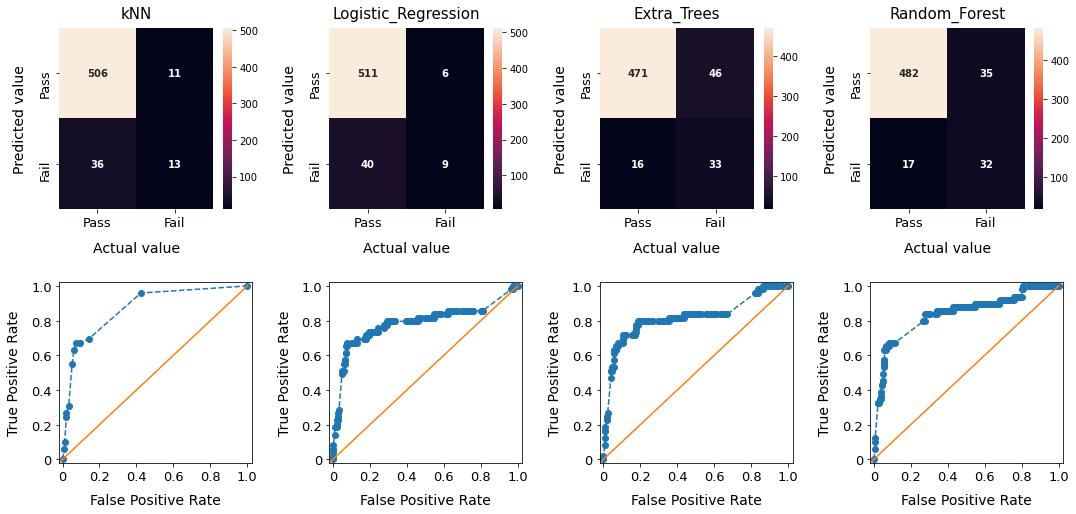

In [82]:
fig, ax = plt.subplots(2, 4, figsize=(18,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                         Confusion Matrix                                            #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################

i = 0
for name in specific_models:
    y_pred = models[name].best_estimator_.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)

    sns.heatmap(cm, annot=True, annot_kws={"size": 10, "weight": "bold"}, fmt='g', ax=ax[0,i])
    
    ticks=['Pass', 'Fail']
    ax[0,i].set_yticklabels(ticks, fontsize=13)
    ax[0,i].set_xticklabels(ticks, fontsize=13)
    ax[0,i].set_xlabel('Actual value', labelpad=12, fontsize=14)
    ax[0,i].set_ylabel('Predicted value', labelpad=12, fontsize=14)
    
    ax[0,i].set_title(specific_models[i], y=1.02, fontsize=15)
    i+=1

#######################################################################################################
#-----------------------------------------------------------------------------------------------------#
#                                           ROC curve                                                 #
#-----------------------------------------------------------------------------------------------------#
#######################################################################################################


i = 0
for name in specific_models:
    probs = models[name].best_estimator_.predict_proba(X_test) 
    probs = probs[:, 1] 
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, probs)
    
    ax[1,i].plot(rf_fpr, rf_tpr, '--o')
    ax[1,i].plot([-0.02,1.],[-0.02,1.], '-')
    
    ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    ax[1,i].set_xticks(ticks)
    ax[1,i].set_xticklabels(ticks, fontsize=13)

    ax[1,i].set_yticks(ticks)
    ax[1,i].set_yticklabels(ticks, fontsize=13)

    ax[1,i].set_xlim(-0.02,1.025)
    ax[1,i].set_ylim(-0.02,1.025)

    ax[1,i].set_xlabel('False Positive Rate', fontsize=14, labelpad=10)
    ax[1,i].set_ylabel('True Positive Rate', fontsize=14, labelpad=10)
    
    i+=1;

**Feature importancces**

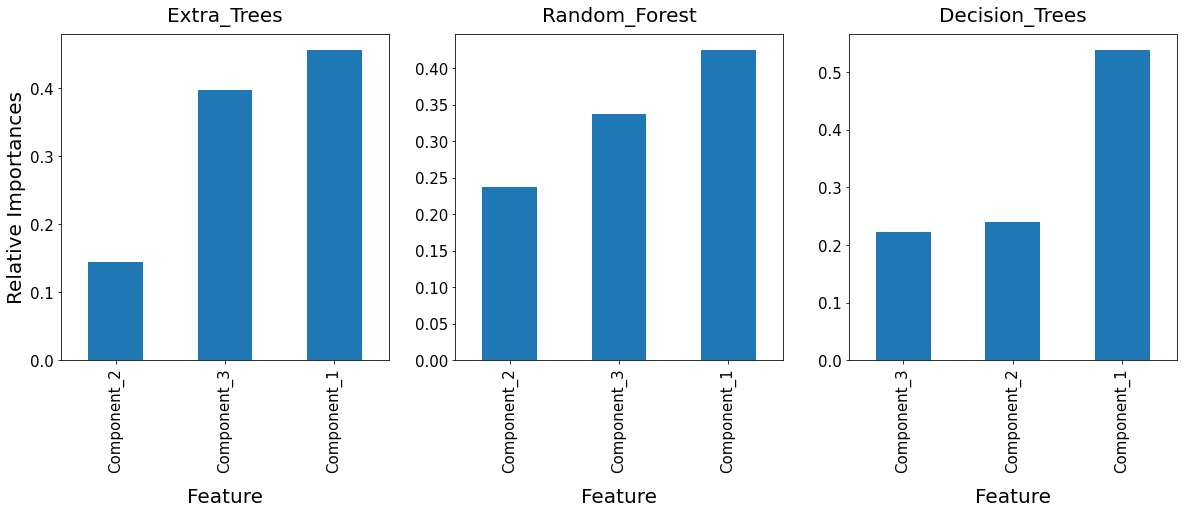

In [83]:
fig, ax = plt.subplots(1,3,figsize=(20,6))

for i, name in enumerate(['Extra_Trees','Random_Forest','Decision_Trees']):
    best_model = models[name].best_estimator_
    feature_importances = pd.Series(best_model.feature_importances_,
                                    data_fa.columns[:-1]).sort_values(ascending=True)

    feature_importances.plot(kind='bar', fontsize=15, ax=ax[i])
    ax[i].set_xlabel('Feature', labelpad=15, fontsize=20)
    ax[i].set_title(name, y=1.02, fontsize=20)
    if i==0:
        ax[i].set_ylabel('Relative Importances', fontsize=20);

Let's find out the optimal model based on the F1-score:

In [84]:
which_algorithm = results[results['F1-score']==results['F1-score'].max()]['Classifier']
best_model_method_3 = best_estimator[which_algorithm.values[0]]

results[results['F1-score']==results['F1-score'].max()]

,Classifier,Accuracy,Precision,Recall,ROC-AUC,F1-score
3,Extra_Trees,90.14 $\pm$ 1.45,42.11 $\pm$ 6.57,65.05 $\pm$ 9.7,78.77 $\pm$ 7.0,52.67 $\pm$ 7.14


Store the predictions

In [85]:
predictions_method_3 = best_model_method_3.predict(X)
data_method_predictions["Pred. Method 3"] = predictions_without_weights

**Conclusions**

Factor Analysis is a dimensionality reduction method which is mainly used when features are categorical. I transformed the first 4 features because those were enough to overtake the threshold of 80%. The best model has been performed by the Decision Trees. Looking at the confusion matrix and f1-score the many predicted values has been misclassified.

# Analyzing the methods

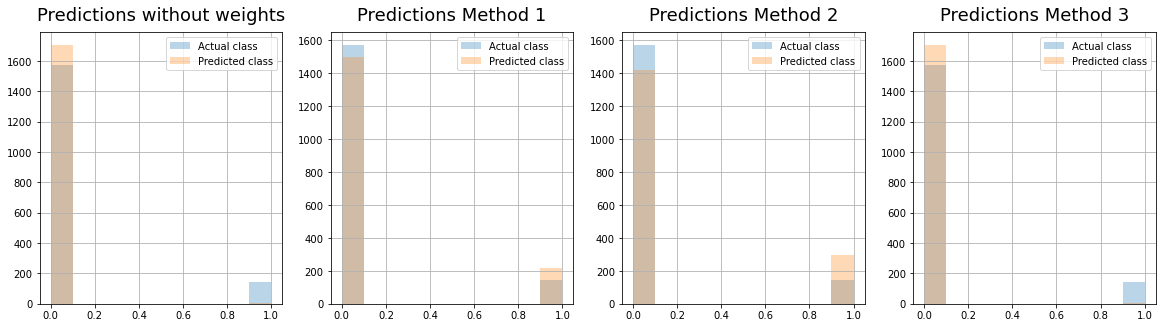

In [86]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

data_method_predictions.Class.hist(ax=ax[0], alpha=0.3, label='Actual class')
data_method_predictions['Pred. without weights'].hist(ax=ax[0], alpha=0.3, label='Predicted class')
ax[0].set_title('Predictions without weights', y=1.02, fontsize=18)
ax[0].legend()

data_method_predictions.Class.hist(ax=ax[1], alpha=0.3, label='Actual class')
data_method_predictions['Pred. Method 1'].hist(ax=ax[1], alpha=0.3, label='Predicted class')
ax[1].set_title('Predictions Method 1', y=1.02, fontsize=18)
ax[1].legend()

data_method_predictions.Class.hist(ax=ax[2], alpha=0.3, label='Actual class')
data_method_predictions['Pred. Method 2'].hist(ax=ax[2], alpha=0.3, label='Predicted class')
ax[2].set_title('Predictions Method 2', y=1.02, fontsize=18)
ax[2].legend()

data_method_predictions.Class.hist(ax=ax[3], alpha=0.3, label='Actual class')
data_method_predictions['Pred. Method 3'].hist(ax=ax[3], alpha=0.3, label='Predicted class')
ax[3].set_title('Predictions Method 3', y=1.02, fontsize=18)
ax[3].legend();

In [87]:
methods_analysis = data_method_predictions[['Class','Pred. without weights','Pred. Method 1',
                                            'Pred. Method 2','Pred. Method 3']]

In [88]:
columns = ['Pred. without weights','Pred. Method 1','Pred. Method 2', 'Pred. Method 3']

# count how many are in total with 0 and 1 in the variable Class
how_many_0 = methods_analysis[methods_analysis.Class==0]['Class'].count()
how_many_1 = methods_analysis[methods_analysis.Class==1]['Class'].count()

perc_mis_0_to_1_per_method, perc_mis_1_to_0_per_method = [], []

for x in columns:
    mis_0_to_1 = methods_analysis[(methods_analysis.Class==0) &
                                  (methods_analysis[x]==1)][x].count()
    mis_1_to_0 = methods_analysis[(methods_analysis.Class==1) &
                                (methods_analysis[x]==0)][x].count()

    perc_mis_0_to_1_per_method.append(round(mis_0_to_1/how_many_0*100,2))
    perc_mis_1_to_0_per_method.append(round(mis_1_to_0/how_many_1*100,2))
    
    
    correct_classified_0 = methods_analysis[(methods_analysis.Class==0) &
                                            (methods_analysis[x]==0)][x].count()
    correct_classified_1 = methods_analysis[(methods_analysis.Class==1) &
                                            (methods_analysis[x]==1)][x].count()
    
   
    print('For the column', x,':')
    print()
    print('Classified 0 but predicted to 1:', mis_0_to_1)
    print('Classified 1 but predicted to 0:', mis_1_to_0)
    print('-'*40)

For the column Pred. without weights :

Classified 0 but predicted to 1: 2
Classified 1 but predicted to 0: 137
----------------------------------------
For the column Pred. Method 1 :

Classified 0 but predicted to 1: 120
Classified 1 but predicted to 0: 45
----------------------------------------
For the column Pred. Method 2 :

Classified 0 but predicted to 1: 178
Classified 1 but predicted to 0: 26
----------------------------------------
For the column Pred. Method 3 :

Classified 0 but predicted to 1: 2
Classified 1 but predicted to 0: 137
----------------------------------------


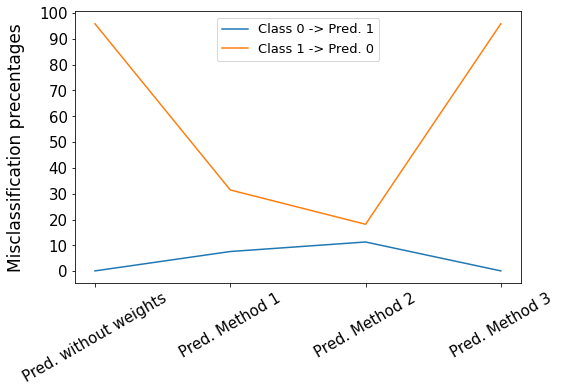

In [89]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

pos = np.arange(4)
ax.plot(pos, perc_mis_0_to_1_per_method, label='Class 0 -> Pred. 1')
ax.plot(pos, perc_mis_1_to_0_per_method, label='Class 1 -> Pred. 0')
ax.set_xticks(pos)
ax.set_xticklabels(columns, fontsize=15, rotation=30)
ax.set_yticks([i for i in range(0,110,10)])
ax.set_yticklabels([i for i in range(0,110,10)], fontsize=15)

ax.set_ylabel('Misclassification precentages', labelpad=14, fontsize=17)

ax.legend(loc='best', fontsize=13);

I choose the best model of method 1 because leads to lower misclassification for the minority class.

# Conclusions

Summarizing, I followed a specific conceptualization to arrive in this section. Firstly, I checked for duplicated columns because the majority of the variables was binary. More than 50% of the original number of columns had to be removed, because they were duplicated, and this led to a too smaller dataset. I checked the correlation between the target feature and the binary features using chi-squared and mutual-info test. The result led a new reduction!

I used different methods to forecast the Class feature because the target column was unbalanced. In each method, same algorithms were used by tuning each time the hyperparameters. The comparison of the results was done by using the f1-score. The first and second method lead to good results. I chose the model of method 1 because leads to lower misclassification for the minority class, as shown in the last figure. Based on that model, I already know that around 30% of the predicted class Fail is misclassified and same applies for the predicted class Pass with a percentage of 10%.

Before I move on to the appendix to use the model in order to predict the classes for the Test.csv file, I have to say that the best estimator of the models of methods 1 & 2 needs to run a lot of times for different splitted data by enhancing the hyperparameters and collecting enough statistics to select the best one in the end! 

# Appendix - Prepare the submission file

In [90]:
test_set = pd.read_csv('Test.csv')
test_set.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Include the features after the chi_squared test**

In [91]:
test_set = test_set[continuous_features + data.columns[np.where(scores_chi>=1)].tolist()]
test_set.head()

,feature_1,feature_2,feature_3,feature_13,feature_345,feature_954,feature_1044,feature_1048,feature_1110,feature_1137,...,feature_1392,feature_1397,feature_1405,feature_1419,feature_1420,feature_1433,feature_1453,feature_1481,feature_1511,feature_1530
0,60.0,468.0,7.8000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Scale the data**

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
mm = MinMaxScaler()

for col in test_set.columns[:3]:
    ss.fit(test_set[col].to_numpy().reshape(-1,1))
    test_set[col] = ss.transform(test_set[col].to_numpy().reshape(-1,1))
    test_set[col] = mm.fit_transform(test_set[col].to_numpy().reshape(-1,1)).reshape(1,-1)[0]

**Apply the model of method 1**

I already know that around 28% of Predicted class 1 must had been predicted as 0, and around 8% of class 0 to 1. Those are the misclassifications that I would wait for the test set, if I knew real Class.

In [93]:
predictions_test_set = best_model_method_1.predict(test_set)
test_set['Predicted Class'] = predictions_test_set

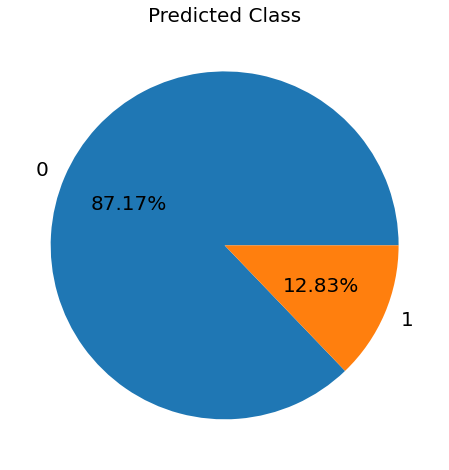

In [94]:
round((test_set['Predicted Class'].value_counts()/test_set.shape[0])*100,2).plot.pie(autopct='%1.2f%%',
                                                                            figsize=(8,8), fontsize=20)
plt.title('Predicted Class', fontsize=20)
plt.ylabel('');

**Submission**

In [95]:
test_set['Predicted Class'].to_csv('Submission.csv', index=False)